In [2]:
%matplotlib inline

In [3]:
import numpy as np
import os
#import sys, h5py, binascii

import pygimli as pg
from pygimli.meshtools import appendTriangleBoundary, merge2Meshes, mesh
from pygimli.mplviewer import drawMesh
from pygimli.viewer import showMesh
#from pygimli.meshtools.mesh import exportHDF5Mesh
#from pygimli.meshtools import convertMesh

In [4]:
#Def des paramètres de géométrie du modéle
xmin,xmax = 0, 40 # en cm
emin,emax = 0, 80 #  elevation en cm
dtrou = 30 # prof du trou en cm
etrou = emax - dtrou # elevation du fond du trou
r=2 # rayon du trou en cm
dx = .1 #On définit le pas de la maille
zaff= 20 #profondeur en cm jusqu'où on souhaite un maillage affiné. 
eaff=etrou-zaff

assert dtrou + zaff < emax

xtrou_reg = np.arange(xmin, r + dx, dx, 'float')
etrou_reg = np.arange(etrou, emax + dx, dx, 'float')


efin_reg = np.arange(eaff, etrou + dx, dx, 'float')
h_0=-95 #charge initiale en cm, soit l'état initial du sol (teneur en eau exprimée en charge)
h_1=10 #hauteur d'eau au fond du trou en cm

In [5]:
etrou_reg[len(etrou_reg)-2:0:-1];

In [6]:
#A présent on crée une zone grâce à un polygone

poly = pg.Mesh(2)  # empty 2d mesh
nStart = poly.createNode(r, emax, 0.0) #On crée un noeud de départ, on travaille en 2D donc le dernier terme vaut 0.0

nA = nStart #On définit le noeud de départ
for e in etrou_reg[len(etrou_reg)-2:0:-1]: #On démarre du haut et on se balade sur l'axe des z en créant un noeud à chaque fois
    nB = poly.createNode(r, e, 0.0)
    poly.createEdge(nA, nB) #On définit un côté entre le noeud précédemment crée et le nouveau
    nA = nB #On remplace le noeud de départ par le noeud nouvellement crée

nB = poly.createNode(r, etrou, 0.0) #On crée un noeud    
poly.createEdge(nA, nB)
nA = nB
    
for x in xtrou_reg[len(xtrou_reg)-2:0:-1]:
    nB = poly.createNode(x, etrou, 0.0)
    poly.createEdge(nA, nB) #On définit un côté entre le noeud précédemment crée et le nouveau
    nA = nB #On remplace le noeud de départ par le noeud nouvellement crée
    
nB = poly.createNode(0, etrou, 0.0) #On crée un noeud    
poly.createEdge(nA, nB)
nA = nB

for e in efin_reg[len(efin_reg)-2:0:-1]: #On démarre de 1 et on se balade sur l'axe des x en créant un noeud à chaque fois
    nB = poly.createNode(0, e, 0.0)
    poly.createEdge(nA, nB) #On définit un côté entre le noeud précédemment crée et le nouveau
    nA = nB #On remplace le noeud de départ par le noeud nouvellement crée
    
nC = poly.createNode(0.0, 0.0, 0.0)
poly.createEdge(nB, nC)
nD = poly.createNode(xmax, 0.0, 0.0)
poly.createEdge(nC, nD)
nE = poly.createNode(xmax, emax, 0.0)
poly.createEdge(nD, nE)
poly.createEdge(nE, nStart) #On ferme le polygone!

tri = pg.TriangleWrapper(poly) #On appelle la fonction triangle
tri.setSwitches('-pzeAfaq31')
# Ici on a :
# p : planar straight line graph ==> fichier poly
# z : on démarre le comptage à 0
# A : assigne un attribut à chaque triangle qui indique à quel segment il appartient et est lié
# f : algorithme de triangulation (?)
# a : impose une surface contrainte pour chaque triangle on peut ajouter un nombre si on veut préciser
# q31 : impose que les triangles générés aient au minimun des angles de 20° On peut ajouter un nombre derrière pour préciser le nombre que l'o souhaite

In [7]:
#A présent on génère le maillage hétérogène

mesh = pg.Mesh(2) #On appelle le second maillage autour du premier
tri.generate(mesh) #On génère les triangles au sein du polygone précédemment crée

In [8]:
for cell in mesh.cells(): #On génère les cellules de chaque maille
    cell.setMarker(2)
    

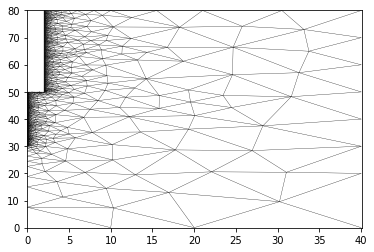

(<matplotlib.axes._subplots.AxesSubplot at 0x7f69907284a8>, None)

In [9]:
showMesh(mesh)

In [10]:
print(mesh_pos.shape)
print(mesh_pos)

NameError: name 'mesh_pos' is not defined

In [11]:
mesh.boundaries() #utiliser la tabulation pour lister les operations possibles sur un objet. mesh.'tab par exemple

mesh.cellCount()
mesh.nodeCount()

1868

In [12]:
for c in mesh.cells():
    print([[node.x(),node.y()] for node in c.nodes()])

[[0.171279466666, 38.85], [0.107533776285, 38.75], [0.269366180869, 38.667638244899]]
[[10.320657517587, 7.262917247301], [20.0, 0.0], [16.950923213359, 12.9643473551]]
[[0.171279466666, 38.85], [0.296477610624, 38.924497154741], [0.183174431626, 39.016076578978996]]
[[0.0, 30.2], [0.107533776285, 30.25], [0.0, 30.3]]
[[0.0, 30.2], [0.0, 30.099999999999998], [0.171279466666, 30.15]]
[[0.0, 39.199999999999996], [0.171279466666, 39.25], [0.0, 39.3]]
[[0.107533776285, 38.449999999999996], [0.0, 38.5], [0.0, 38.4]]
[[0.171279466666, 30.45], [0.0, 30.5], [0.0, 30.4]]
[[0.322002933822, 38.337432049158], [0.171279466666, 38.35], [0.222517679611, 38.223510141104]]
[[0.0, 30.599999999999998], [0.0, 30.5], [0.107533776285, 30.55]]
[[0.0, 30.5], [0.171279466666, 30.45], [0.107533776285, 30.55]]
[[0.107533776285, 38.449999999999996], [0.0, 38.4], [0.171279466666, 38.35]]
[[0.0, 30.3], [0.107533776285, 30.25], [0.08863965212, 30.349999999999998]]
[[0.107533776285, 39.15], [0.171279466666, 39.25], [

[[2.990842283348, 51.982244564916], [2.597715646402, 51.434618848038], [2.955042529072, 51.383488173677]]
[[0.269366180869, 38.667638244899], [0.184934674056, 38.598040628915996], [0.249370305254, 38.470097109393]]
[[0.171279466666, 39.75], [0.473677826746, 39.744978909058], [0.32826830716, 40.01016950306]]
[[0.52809319155, 39.042504012110996], [0.269366180869, 39.067638244899], [0.296477610624, 38.924497154741]]
[[1.499980024239, 49.828038341536], [1.45, 49.743734710846], [1.531517828011, 49.689329300391]]
[[0.171279466666, 48.449999999999996], [0.171279466666, 48.25], [0.36775207931, 48.213698627865]]
[[1.05, 49.828720533334], [1.05, 49.610154677726996], [1.232361755101, 49.730633819131]]
[[0.296477610624, 48.975502845259], [0.269366180869, 48.832361755101], [0.52809319155, 48.857495987888996]]
[[2.52809319155, 51.057495987889], [2.269366180869, 51.032361755101], [2.4099176197989998, 50.85]]
[[2.269366180869, 52.667638244898995], [2.32826830716, 52.51016950306], [2.568528865202, 52.6

In [1]:
#c=mesh.cell(0) renvoie la cellule 0

def crossprod(c):

    node0=c.node(0)
    a0=np.array([node0.x(),node0.y()])
    node1=c.node(1)
    a1=np.array([node1.x(),node1.y()])
    node2=c.node(2)
    a2=np.array([node2.x(),node2.y()])

    #faire un produit vectoriel entre node[1]-node[0] et node[2]-node[0]. 
    return np.cross(a1-a0,a2-a0)

crossprod(mesh.cell(1))
# si négatif, node[1],node[2]=node[2],node[1]
# afficher node[0] node[1] node[2]
#c.boundaryNodes

NameError: name 'mesh' is not defined

In [16]:
f=open("maillage.txt","w")

for c in mesh.cells(): 
    assert crossprod(c) > 0 # arrete tout si c'est faux.
    for node in c.nodes():
        #f.write(str([[node.x(),node.y()]]))
        f.write("{} {} \n".format(node.x(),node.y()))
f.close()
    

In [17]:
f=open("maillage.txt","w")

for node in mesh.nodes():
    f.write("{} {} \n".format(node.x(),node.y()))
f.close()
    

In [18]:
!cat maillage.txt

2.0 80.0 
2.0 79.89999999999999 
2.0 79.8 
2.0 79.7 
2.0 79.6 
2.0 79.5 
2.0 79.39999999999999 
2.0 79.3 
2.0 79.2 
2.0 79.1 
2.0 79.0 
2.0 78.89999999999999 
2.0 78.8 
2.0 78.7 
2.0 78.6 
2.0 78.5 
2.0 78.39999999999999 
2.0 78.3 
2.0 78.2 
2.0 78.1 
2.0 78.0 
2.0 77.89999999999999 
2.0 77.8 
2.0 77.7 
2.0 77.6 
2.0 77.5 
2.0 77.39999999999999 
2.0 77.3 
2.0 77.2 
2.0 77.1 
2.0 77.0 
2.0 76.89999999999999 
2.0 76.8 
2.0 76.7 
2.0 76.6 
2.0 76.5 
2.0 76.39999999999999 
2.0 76.3 
2.0 76.2 
2.0 76.1 
2.0 76.0 
2.0 75.89999999999999 
2.0 75.8 
2.0 75.7 
2.0 75.6 
2.0 75.5 
2.0 75.39999999999999 
2.0 75.3 
2.0 75.2 
2.0 75.1 
2.0 75.0 
2.0 74.89999999999999 
2.0 74.8 
2.0 74.7 
2.0 74.6 
2.0 74.5 
2.0 74.39999999999999 
2.0 74.3 
2.0 74.2 
2.0 74.1 
2.0 74.0 
2.0 73.89999999999999 
2.0 73.8 
2.0 73.7 
2.0 73.6 
2.0 73.5 
2.0 73.39999999999999 
2.0 73.3 
2.0 73.2 
2.0 73.1 
2.0 73.0 
2.0 72.89999999999999 
2.0 72.8 
2.0 72.7 
2.0 72.6 
2.0 72.5 
2.0 72.39999999999999 
2.0 72.3 
2.0 72.2 
2.

In [16]:
!head -686 maillage.txt

2.0 80.0 
2.0 79.89999999999999 
2.0 79.8 
2.0 79.7 
2.0 79.6 
2.0 79.5 
2.0 79.39999999999999 
2.0 79.3 
2.0 79.2 
2.0 79.1 
2.0 79.0 
2.0 78.89999999999999 
2.0 78.8 
2.0 78.7 
2.0 78.6 
2.0 78.5 
2.0 78.39999999999999 
2.0 78.3 
2.0 78.2 
2.0 78.1 
2.0 78.0 
2.0 77.89999999999999 
2.0 77.8 
2.0 77.7 
2.0 77.6 
2.0 77.5 
2.0 77.39999999999999 
2.0 77.3 
2.0 77.2 
2.0 77.1 
2.0 77.0 
2.0 76.89999999999999 
2.0 76.8 
2.0 76.7 
2.0 76.6 
2.0 76.5 
2.0 76.39999999999999 
2.0 76.3 
2.0 76.2 
2.0 76.1 
2.0 76.0 
2.0 75.89999999999999 
2.0 75.8 
2.0 75.7 
2.0 75.6 
2.0 75.5 
2.0 75.39999999999999 
2.0 75.3 
2.0 75.2 
2.0 75.1 
2.0 75.0 
2.0 74.89999999999999 
2.0 74.8 
2.0 74.7 
2.0 74.6 
2.0 74.5 
2.0 74.39999999999999 
2.0 74.3 
2.0 74.2 
2.0 74.1 
2.0 74.0 
2.0 73.89999999999999 
2.0 73.8 
2.0 73.7 
2.0 73.6 
2.0 73.5 
2.0 73.39999999999999 
2.0 73.3 
2.0 73.2 
2.0 73.1 
2.0 73.0 
2.0 72.89999999999999 
2.0 72.8 
2.0 72.7 
2.0 72.6 
2.0 72.5 
2.0 72.39999999999999 
2.0 72.3 
2.0 72.2 
2.

In [17]:
c=mesh.cell(0)
print(c)

<class 'pygimli.core._pygimli_.Triangle'>	ID: 0, Marker: 2, Size: 0.010716723699152081
	559 RVector3: (0.171279466666, 38.85, 0.0)
	685 RVector3: (0.107533776285, 38.75, 0.0)
	1041 RVector3: (0.269366180869, 38.667638244899, 0.0)



In [18]:
c=mesh.cell(0)
l=c.node(2)
l.id()


1041

In [19]:
c.node(0) == mesh.node(559)

True

In [20]:
for node in c.nodes():
    print(node.id())

559
685
1041


In [21]:
print(mesh.node(559))

In [22]:
list(l[1])

TypeError: 'float' object is not iterable

In [23]:
mesh.saveAscii('mesh.a')

1

## Ecriture du fichier selector.in

In [24]:
param = [0.06, 0.3, 0.06, 0.3, 0.016, 8.52, 0.07, 0.07, 0.3]
temps=[0.17, 0.33, 0.50, 0.67, 0.83, 1.00, 1.17, 1.33, 1.50, 1.67, 1.83, 2.00, 2.17, 2.33, 2.50, 2.67, 2.83, 3.00, 3.17, 3.33, 3.50, 3.67, 3.83, 4.00]

paramlist=" ".join([str(i) for i in param])
tempslist=" ".join([str(i) for i in temps])

s = """
*** BLOCK A: BASIC INFORMATION *****************************************
'Heading'
Example 1 - Column Test
LUnit  TUnit  MUnit  BUnit     (units are obligatory for all input data)
 'cm'   'min'  '-'    '-'
Kat (0:horizontal plane, 1:axisymmetric vertical flow, 2:vertical plane
1
MaxIt   TolTh   TolH       (maximum number of iterations and tolerances)
  21    .001   0.5
lWat    lChem   ChecF   ShortF  FluxF   AtmInF  SeepF  FreeD  DrainF
 t  f  f      t       t       f       f      t      f
*** BLOCK B: MATERIAL INFORMATION **************************************
NMat    NLay    hTab1   hTabN   NPar
  1      1      .001    200.     9
thr     ths     tha     thm     Alfa    n       Ks      Kk      thk
 {}
*** BLOCK C: TIME INFORMATION ******************************************
dt      dtMin   dtMax   DMul    DMul2   MPL
 .1    .01     10.     1.1     .7     24
TPrint(1),TPrint(2),...,TPrint(MPL)                   (print-time array)
   {}
*** END OF INPUT FILE SELECTOR.IN************************************
""".format(paramlist,tempslist)

In [25]:
fselector=open("Selector.in","w")

fselector.write(s)

fselector.close()

In [26]:
!cat Selector.in


*** BLOCK A: BASIC INFORMATION *****************************************
'Heading'
Example 1 - Column Test
LUnit  TUnit  MUnit  BUnit     (units are obligatory for all input data)
 'cm'   'min'  '-'    '-'
Kat (0:horizontal plane, 1:axisymmetric vertical flow, 2:vertical plane
1
MaxIt   TolTh   TolH       (maximum number of iterations and tolerances)
  21    .001   0.5
lWat    lChem   ChecF   ShortF  FluxF   AtmInF  SeepF  FreeD  DrainF
 t  f  f      t       t       f       f      t      f
*** BLOCK B: MATERIAL INFORMATION **************************************
NMat    NLay    hTab1   hTabN   NPar
  1      1      .001    200.     9
thr     ths     tha     thm     Alfa    n       Ks      Kk      thk
 0.06 0.3 0.06 0.3 0.016 8.52 0.07 0.07 0.3
*** BLOCK C: TIME INFORMATION ******************************************
dt      dtMin   dtMax   DMul    DMul2   MPL
 .1    .01     10.     1.1     .7     24
TPrint(1),TPrint(2),...,TPrint(MPL)                   (print-time array)
   0.17 0.33 0.5

## Ecriture du fichier Grid.in

In [27]:
Ncells = mesh.cellCount() #nombre de cellules du maillage
Nnodes = mesh.nodeCount() #nombre de noeuds du maillage
Nbc = 100 #nombre de noeuds avec Boundary conditions. A DEFINIR AVEC CLEMENCE!!
Nnodes, Ncells, Nbc

(1868, 3181, 100)

In [28]:
dim = [Nnodes, Ncells, 2, Nbc, 0]

dim_list=" ".join([str(i) for i in dim])

s1 = """
*** BLOCK H: NODAL INFORMATION **************************************************
      NumNP     NumEl       IJ      NumBP     NObs
   {}
   n  Code    x      z          h       Conc      Q     M   B    Axz   Bxz   Dxz
""".format(dim_list)

s2 = """
*** BLOCK I: ELEMENT INFORMATION ************************************************
   e   i   j   k   l   Angle  Aniz1  Aniz2  LayNum
"""


In [29]:
fgrid=open("Grid.in","w")

fgrid.write(s1)

code = 1 #A définir par clemence pour chaque node
h = -80  #A definir par clemence pour chaque node

# for i in np.arange(Nnodes):
#   fgrid.write("""{} {} {} {} {} .00E+00 .00E+00 1 0 1 1 1 \n""".format(i + 1, code, node.x(i), node.y(i), h)) 

for node in mesh.nodes():
   fgrid.write("""{} {} {} {} {} .00E+00 .00E+00 1 0 1 1 1 \n""".format(node.id() + 1, code, node.x(), node.y(), h)) 
    
#Attention, il faut enlever une ligne mais je ne vois pas comment faire...
fgrid.write(s2)

fgrid.close()

In [30]:
!tail -2000 Grid.in


*** BLOCK H: NODAL INFORMATION **************************************************
      NumNP     NumEl       IJ      NumBP     NObs
   1868 3181 2 100 0
   n  Code    x      z          h       Conc      Q     M   B    Axz   Bxz   Dxz
1 1 2.0 80.0 -80 .00E+00 .00E+00 1 0 1 1 1 
2 1 2.0 79.89999999999999 -80 .00E+00 .00E+00 1 0 1 1 1 
3 1 2.0 79.8 -80 .00E+00 .00E+00 1 0 1 1 1 
4 1 2.0 79.7 -80 .00E+00 .00E+00 1 0 1 1 1 
5 1 2.0 79.6 -80 .00E+00 .00E+00 1 0 1 1 1 
6 1 2.0 79.5 -80 .00E+00 .00E+00 1 0 1 1 1 
7 1 2.0 79.39999999999999 -80 .00E+00 .00E+00 1 0 1 1 1 
8 1 2.0 79.3 -80 .00E+00 .00E+00 1 0 1 1 1 
9 1 2.0 79.2 -80 .00E+00 .00E+00 1 0 1 1 1 
10 1 2.0 79.1 -80 .00E+00 .00E+00 1 0 1 1 1 
11 1 2.0 79.0 -80 .00E+00 .00E+00 1 0 1 1 1 
12 1 2.0 78.89999999999999 -80 .00E+00 .00E+00 1 0 1 1 1 
13 1 2.0 78.8 -80 .00E+00 .00E+00 1 0 1 1 1 
14 1 2.0 78.7 -80 .00E+00 .00E+00 1 0 1 1 1 
15 1 2.0 78.6 -80 .00E+00 .00E+00 1 0 1 1 1 
16 1 2.0 78.5 -80 .00E+00 .00E+00 1 0 1 1 1 
17 1 2.0 78.39

# Exemples

## Formatage multiligne

In [82]:
t = [1,2,3,4]

In [83]:
s = """
a b c
{} 34 2
sdfqsdf sqdf {}
""".format(37, t)

In [84]:
print(s)


a b c
37 34 2
sdfqsdf sqdf [1, 2, 3, 4]



## Formatage d'un tableau sans virgules, crochet ...

In [49]:
t

[1, 2, 3, 4]

In [53]:
" coucou ".join(["a", "b", "c", "d"])

'a coucou b coucou c coucou d'

In [55]:
" ".join([str(i) for i in t])

'1 2 3 4'

## Configurer l'affichage des noeuds

In [58]:
n = mesh.node(19)

In [60]:
n

In [63]:
def f(node):
    return "{} {}".format(node.x(), node.y())

In [64]:
f(n)

'2.0 78.1'

In [67]:
n.__repr__()

'<pygimli.core._pygimli_.Node object at 0x7f3b86ab76c0>'

In [68]:
type(n).__repr__ = f

In [69]:
n

2.0 78.1

In [71]:
c = mesh.cell(10)

In [73]:
print(c)

<class 'pygimli.core._pygimli_.Triangle'>	ID: 10, Marker: 2, Size: 0.006970331073775099
	515 RVector3: (0.0, 30.5, 0.0)
	548 RVector3: (0.171279466666, 30.45, 0.0)
	664 RVector3: (0.107533776285, 30.55, 0.0)



In [75]:
list(mesh.nodes())

[2.0 80.0,
 2.0 79.89999999999999,
 2.0 79.8,
 2.0 79.7,
 2.0 79.6,
 2.0 79.5,
 2.0 79.39999999999999,
 2.0 79.3,
 2.0 79.2,
 2.0 79.1,
 2.0 79.0,
 2.0 78.89999999999999,
 2.0 78.8,
 2.0 78.7,
 2.0 78.6,
 2.0 78.5,
 2.0 78.39999999999999,
 2.0 78.3,
 2.0 78.2,
 2.0 78.1,
 2.0 78.0,
 2.0 77.89999999999999,
 2.0 77.8,
 2.0 77.7,
 2.0 77.6,
 2.0 77.5,
 2.0 77.39999999999999,
 2.0 77.3,
 2.0 77.2,
 2.0 77.1,
 2.0 77.0,
 2.0 76.89999999999999,
 2.0 76.8,
 2.0 76.7,
 2.0 76.6,
 2.0 76.5,
 2.0 76.39999999999999,
 2.0 76.3,
 2.0 76.2,
 2.0 76.1,
 2.0 76.0,
 2.0 75.89999999999999,
 2.0 75.8,
 2.0 75.7,
 2.0 75.6,
 2.0 75.5,
 2.0 75.39999999999999,
 2.0 75.3,
 2.0 75.2,
 2.0 75.1,
 2.0 75.0,
 2.0 74.89999999999999,
 2.0 74.8,
 2.0 74.7,
 2.0 74.6,
 2.0 74.5,
 2.0 74.39999999999999,
 2.0 74.3,
 2.0 74.2,
 2.0 74.1,
 2.0 74.0,
 2.0 73.89999999999999,
 2.0 73.8,
 2.0 73.7,
 2.0 73.6,
 2.0 73.5,
 2.0 73.39999999999999,
 2.0 73.3,
 2.0 73.2,
 2.0 73.1,
 2.0 73.0,
 2.0 72.89999999999999,
 2.0 72.8,
 2